In [30]:
%load_ext autoreload
%autoreload 2

import numpy  as np
import pandas as pd
import h5py

import ehtplot
from matplotlib import pyplot as plt
from astropy import units as u

from common import viz
from common import io_ipole as io

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
def readsed(f, snapshot=None):

    with h5py.File(f) as h:
        time = h['time'][:]
        nu   = h['nu'  ][:]
        knd  = h['knd' ][:]
        avg  = h['avg' ][:]
      # err  = h['err' ][:]
        rlz  = h['len' ][:]

    if not all(rlz == 16):
        print('WARNING: less than 16 realizations:', f)
    
    return time, nu, avg, [k.decode("utf-8") for k in knd]

def Fnu_to_nuLnu(nu, Fnu):
    d = 8.127e3 * u.pc
    S = 4 * np.pi * d * d
    return (Fnu*u.Jy * S * nu*u.Hz).to(u.erg/u.second).value

In [32]:
time, nu, sedP, knd = readsed('cache/Illinois_thermal_w5/Ma+0.5_i30/sed_Rh40.h5')
time, nu, sedF, knd = readsed('cache/Illinois_thermal_w5/Sa+0.5_i90/sed_Rh40.h5')

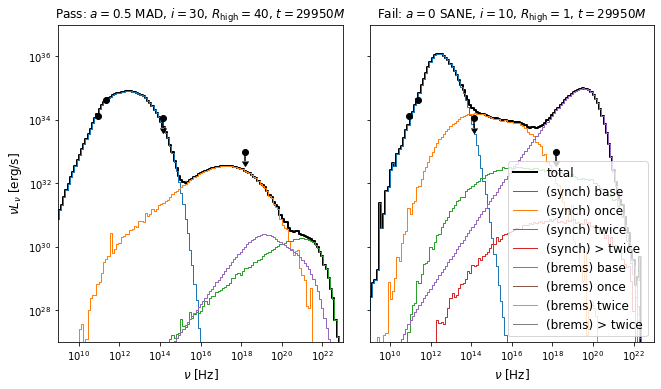

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(9,5), sharey=True)
fig.tight_layout()

viz.step(axes[0], nu, np.mean(sedP, axis=0), label=knd)
axes[0].set_title(r'Pass: $a=0.5$ MAD, $i=30$, $R_\mathrm{high}=40$, $t=29950M$')
axes[0].set_xlim(1e9,  1e23)
axes[0].set_ylim(1e27, 1e37)
axes[0].set_xlabel(r'$\nu$ [Hz]',          fontsize=12)
axes[0].set_ylabel(r'$\nu L_\nu$ [erg/s]', fontsize=12)
axes[0].errorbar(
    [86e9, 230e9, 1.4141e+14, 1.45e18], 
    [Fnu_to_nuLnu(86e9,1.9), Fnu_to_nuLnu(230e9,2.4), Fnu_to_nuLnu(1.4141e+14,1e-3), 1e33],
    yerr=[Fnu_to_nuLnu(86e9,0.2), 0, Fnu_to_nuLnu(1.4141e+14,1e-3)/2, 1e33/2],
    uplims=[False,False,True,True],
    fmt='o', color='k',
)

viz.step(axes[1], nu, np.mean(sedF, axis=0), label=knd)
axes[1].set_title(r'Fail: $a=0$ SANE, $i=10$, $R_\mathrm{high}=1$, $t=29950M$')
axes[1].set_xlim(1e9,  1e23)
axes[1].set_ylim(1e27, 1e37)
axes[1].set_xlabel(r'$\nu$ [Hz]',          fontsize=12)
axes[1].errorbar(
    [86e9, 230e9, 1.4141e+14, 1.45e18], 
    [Fnu_to_nuLnu(86e9,1.9), Fnu_to_nuLnu(230e9,2.4), Fnu_to_nuLnu(1.4141e+14,1e-3), 1e33],
    yerr=[Fnu_to_nuLnu(86e9,0.2), 0, Fnu_to_nuLnu(1.4141e+14,1e-3)/2, 1e33/2],
    uplims=[False,False,True,True],
    fmt='o', color='k',
)
axes[1].legend(fontsize=12)

fig.savefig('output/passfail_sed.pdf', bbox_inches='tight')